<a href="https://colab.research.google.com/github/YezhouLi/628-Module-3-Group-9/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import pymongo as pm
import re
from wordcloud import WordCloud           # Import the wordcloud library
from collections import Counter

In [0]:
dataPath = "/content/drive/My Drive/data/"

In [0]:
# takes a lot of time to read csv file
# be careful when running this cell
business = pd.read_csv(dataPath + "business.csv",
                      dtype={6:np.string_ , 28:np.string_ , 31:np.string_ })
# column (6, 28, 31) has mixed data type
# load them as string

In [0]:
# takes a lot of time to read csv file
# be careful when running this cell
review = pd.read_csv(dataPath + "review.csv")

In [0]:
# takes a lot of time to read csv file
# be careful when running this cell
tip = pd.read_csv(dataPath + "tip.csv")

In [0]:
# takes a lot of time to read csv file
# be careful when running this cell
user = pd.read_csv(dataPath + "user.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
business.head(5)

,address,attributes,attributes_AcceptsInsurance,attributes_AgesAllowed,attributes_Alcohol,attributes_Ambience,attributes_BYOB,attributes_BYOBCorkage,attributes_BestNights,attributes_BikeParking,attributes_BusinessAcceptsBitcoin,attributes_BusinessAcceptsCreditCards,attributes_BusinessParking,attributes_ByAppointmentOnly,attributes_Caters,attributes_CoatCheck,attributes_Corkage,attributes_DietaryRestrictions,attributes_DogsAllowed,attributes_DriveThru,attributes_GoodForDancing,attributes_GoodForKids,attributes_GoodForMeal,attributes_HairSpecializesIn,attributes_HappyHour,attributes_HasTV,attributes_Music,attributes_NoiseLevel,attributes_Open24Hours,attributes_OutdoorSeating,attributes_RestaurantsAttire,attributes_RestaurantsCounterService,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,attributes_RestaurantsTableService,attributes_RestaurantsTakeOut,attributes_Smoking,attributes_WheelchairAccessible,attributes_WiFi,business_id,categories,city,hours,hours_Friday,hours_Monday,hours_Saturday,hours_Sunday,hours_Thursday,hours_Tuesday,hours_Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,NaN,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,NaN,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,False,NaN,u'loud',NaN,False,u'casual',NaN,False,True,2,True,True,True,NaN,NaN,u'no',QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,NaN,9:0-1:0,9:0-0:0,9:0-1:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",NaN,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,True,NaN,u'average',NaN,False,'casual',NaN,False,True,2,True,True,True,NaN,NaN,u'no',gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,NaN,17:30-22:0,17:30-21:30,17:30-22:0,17:30-21:0,17:30-21:30,NaN,17:30-21:30,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,NaN,8:0-17:0,8:0-17:0,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [0]:
list.sort( list( Counter(business['city']).values() ) )

In [0]:
review.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA


In [0]:
tip.head(5)

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [0]:
user.head(5)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.03,1,0,1,2,0,0,1,0,1,0,2,25,"2015,2016,2017",5,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",17,Rashmi,95,84,l6BmjZMeQD3rDxWUbiAiow,2013-10-08 23:11:33
1,3.63,1,0,1,1,0,0,0,0,0,0,0,16,NaN,4,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",22,Jenna,33,48,4XChL029mKr5hydo79Ljxg,2013-02-21 22:29:06
2,3.71,0,0,0,0,0,0,1,0,0,0,0,10,NaN,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",8,David,16,28,bc8C_eETBWL0olvFSJJd0w,2013-10-04 00:16:10
3,4.85,0,0,0,1,0,0,0,0,2,0,1,14,NaN,5,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",4,Angela,17,30,dD0gZpBctWGdWo9WlGuhlA,2014-05-22 15:57:30
4,4.08,80,0,80,28,1,1,16,5,57,0,25,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50


## What we can do 

1. Check what is the language of a given review  
  Wrap it as a function whose input is any string, output is a string indicating the language of the string.  

2. Word Cloud of a store(Good Visualization)  
  The height of each word indicates frequency of the word in the entire review corpus of this store.  
  Also a histogram of ten most common words  
  Try Bigram, Trigram with `Gensim` package
  
3. AFINN Lexicon  
  A common lexicon for sentiment analysis, calculate sentiment based on it.  
  `afinn` python library  
  Check on [Github](https://github.com/fnielsen/afinn/tree/master/afinn/data)  
  [Usage](https://medium.com/@himanshu_23732/sentiment-analysis-with-afinn-lexicon-930533dfe75b) of this lexicon
  
4. Relationship among words
  Clustering words in reviews
  
  
5. Business potential in a given city
Given a city, we provide information to help start a new restaurant, like which kind of food to serve
  
  
6. LDA: Latent Dirichlet Allocation  
  [Elementary Explaination](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)  

  DBSCAN(Density-Based Spatial Clustering of Applications with Noise)


7. Topic Model
  
  
  
  
  
****
**Note**

1. After good visualization, useful business insight still need human interpretation, any way to automatically generate, detect insight
  
  
  
  
  
  
  
****
**Reference**  
1. [Kaggle, extensive data analysis of yelp](https://www.kaggle.com/ambarish/a-very-extensive-data-analysis-of-yelp/report)

2. [Network Analysis in Python](https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#basics-of-networkx-creating-the-graph)

## Latent Dirichlet Allocation

Work solely on the `review` dataset.  

In [6]:
# display the `review` dataset
review.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6.0,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0.0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3.0,n6-Gk65cPZL6Uz8qRm3NYw


In [11]:
type(review['stars'][0])

numpy.float64

In [7]:
# Remove punctuation
review['textTokenized'] = review['text'].map(lambda x: re.sub('[,\.!?]', ' ', str(x)))

# Convert the titles to lowercase
review['textTokenized'] = review['textTokenized'].map(lambda x: x.lower())

# Print out the first rows of papers
review['textTokenized'].head()

0    total bill for this horrible service  over $8g...
1    i *adore* travis at the hard rock's new kelly ...
2    i have to say that this office really has it t...
3    went in for a lunch  steak sandwich was delici...
4    today was my second out of three sessions i ha...
Name: textTokenized, dtype: object

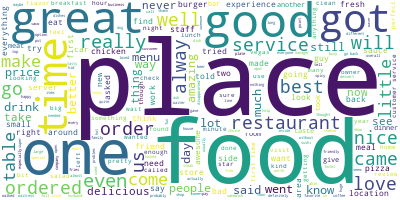

In [8]:
# Join the different processed titles together.
long_string = ','.join(list(review['textTokenized'].values[1:5000]))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

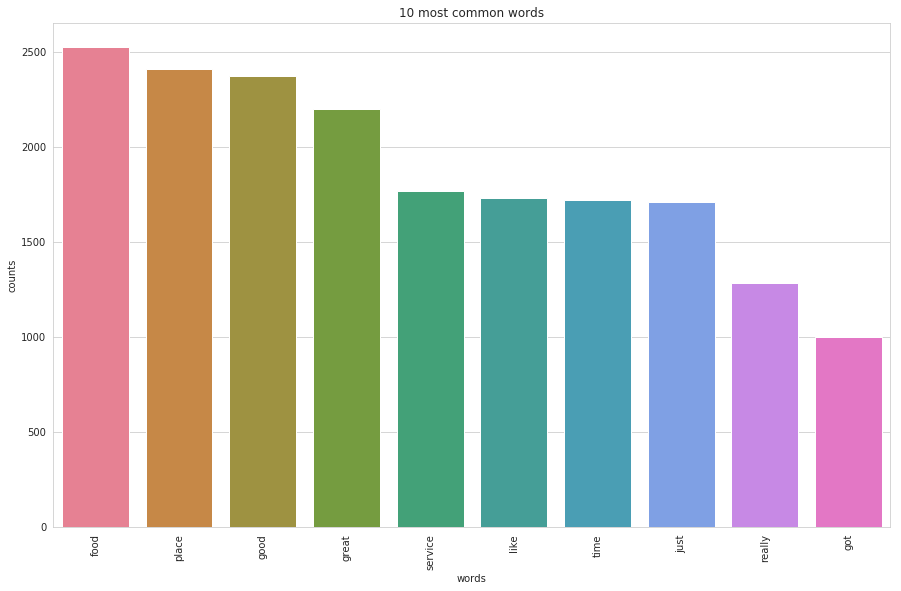

In [9]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(review['textTokenized'][1:5000])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [10]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
time just service like place said didn did got food

Topic #1:
great good place love time like just service staff friendly

Topic #2:
place staff great dr friendly nice dim et sum love

Topic #3:
food good place great like service chicken just really ordered

Topic #4:
time recommend place work great highly did just hair service


In [14]:
badReview = review['textTokenized'][review['stars'] <= 2.1]
badReview.head()

0     total bill for this horrible service  over $8g...
4     today was my second out of three sessions i ha...
7     this place has gone down hill   clearly they h...
8     i was really looking forward to visiting after...
11    walked in around 4 on a friday afternoon  we s...
Name: textTokenized, dtype: object

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(badReview[1:20000])

# Visualise the 10 most common words
# plot_10_most_common_words(count_data, count_vectorizer)


import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [18]:
# Tweak the two parameters below (use int values below 15)
number_topics = 7
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
told car time said called service just did don company

Topic #1:
place store like service don customer location time pizza just

Topic #2:
food good like place just ordered chicken really better sauce

Topic #3:
la le et cab pour est pas ontrac place je

Topic #4:
room hotel place stay like night dirty rooms pool people

Topic #5:
just like time said asked place didn went people service

Topic #6:
food service minutes order time table wait came took restaurant
